In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv("pune house data.csv")
df.sample(10)

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
10681,Super built-up Area,20-Apr,3 BHK,NaN,2214,3.0,2.0,350.00,Fergusson College Road
3041,Super built-up Area,Ready To Move,2 BHK,Vandak,1248,2.0,1.0,69.00,Padmavati
5266,Super built-up Area,18-Aug,2 BHK,Maunt M,1085,2.0,1.0,41.23,Shukrawar Peth
4650,Super built-up Area,Ready To Move,2 BHK,NaN,924,2.0,2.0,35.11,Khadaki
3900,Super built-up Area,Ready To Move,2 BHK,DSingSt,1111,2.0,2.0,41.88,Nagar Road
1885,Plot Area,Ready To Move,4 Bedroom,NaN,1200,4.0,NaN,130.00,Nana Peth
7984,Super built-up Area,Ready To Move,5 BHK,Adeatlm,3692,5.0,NaN,340.00,Chandan Nagar
4657,Super built-up Area,19-Jun,1 BHK,NaN,655,1.0,1.0,53.00,Kothrud
11567,Super built-up Area,18-Jul,2 BHK,KSliaor,1333,2.0,1.0,78.56,Kondhwa Khurd
6684,Super built-up Area,19-Dec,2 BHK,SuVue S,1025,2.0,2.0,27.68,Nagar Road


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
df.columns

Index(['area_type', 'availability', 'size', 'society', 'total_sqft', 'bath',
       'balcony', 'price', 'site_location'],
      dtype='object')

In [6]:
df.isnull().sum()

area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

In [7]:
df.shape


(13320, 9)

### imputing or removing Null Values

In [8]:
df["society"] = df["society"].fillna("Unknown")  ## replaced null values with unknown


In [9]:
df["balcony"] = df["balcony"].fillna(df["balcony"].median())
# df["Number_of_Bhk"] = df["Number_of_Bhk"].fillna(df["Number_of_Bhk"].median())

In [10]:
df["site_location"] = df["site_location"].fillna(df["site_location"].mode()[0])

# replacing the missing values with the most appeared location which is baner by seing the data




In [11]:
def spliting(x):
    if isinstance(x,str):
        return int(x.split(" ")[0])
    else:
        return None
    
df["Number_of_Bhk"] = df["size"].apply(spliting)
    

In [12]:
df["Number_of_Bhk"] = df["Number_of_Bhk"].fillna(df["Number_of_Bhk"].median())

In [13]:
df = df.drop("size",axis=1)

In [14]:
df.isnull().sum()

area_type         0
availability      0
society           0
total_sqft        0
bath             73
balcony           0
price             0
site_location     0
Number_of_Bhk     0
dtype: int64

In [15]:
df["availability"].unique()



array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [16]:
def availability_status(x):
    if isinstance(x, str):
        x = x.strip().lower()
        if x == "ready to move" or x == "immediate possession":
            return 1
        else:
            return 0
    else:
        return 0

df["availability"] = df["availability"].apply(availability_status)


In [17]:
df["availability"].value_counts()

availability
1    10597
0     2723
Name: count, dtype: int64

In [18]:
## converting totalsqfts in 
def convert_sqft_to_num(x):
    try:
        tokens = x.split('-')
        if len(tokens) == 2:
            return (float(tokens[0]) + float(tokens[1])) / 2
        return float(x)
    except:
        return None

df["total_sqft"] = df["total_sqft"].apply(convert_sqft_to_num)
df = df.dropna(subset=["total_sqft"])




In [19]:
df["total_sqft"].describe()

count    13274.000000
mean      1559.626694
std       1238.405258
min          1.000000
25%       1100.000000
50%       1276.000000
75%       1680.000000
max      52272.000000
Name: total_sqft, dtype: float64

In [20]:
df.sample(10)

,area_type,availability,society,total_sqft,bath,balcony,price,site_location,Number_of_Bhk
1010,Plot Area,1,Unknown,600.0,3.0,2.0,65.00,Laxmi Road,4.0
12445,Super built-up Area,1,Soitya,1965.0,4.0,2.0,125.00,Nana Peth,3.0
9865,Super built-up Area,1,Unknown,1120.0,2.0,3.0,36.00,Raviwar Peth,2.0
7353,Super built-up Area,1,Dhalsh,1200.0,2.0,2.0,44.40,Model colony,2.0
4180,Super built-up Area,1,Koowsis,1097.0,2.0,3.0,65.00,Lulla Nagar,2.0
2692,Super built-up Area,1,Cerdsga,1080.0,2.0,0.0,53.35,Aundh,2.0
12863,Super built-up Area,1,Cemesal,1510.0,2.0,2.0,65.00,Warje,3.0
2277,Super built-up Area,0,Sodgere,2254.0,3.0,2.0,170.00,Pirangut,3.0
6606,Plot Area,1,Unknown,1200.0,7.0,3.0,95.00,Satara Road,9.0
10423,Super built-up Area,0,SJerse,1170.0,2.0,2.0,65.00,Manik Bagh,2.0


## Performing EDA

In [21]:
df[["price", "total_sqft", "Number_of_Bhk", "balcony", "Number_of_Bhk"]].describe()


,price,total_sqft,Number_of_Bhk,balcony,Number_of_Bhk
count,13274.000000,13274.000000,13274.000000,13274.000000,13274.000000
mean,112.453654,1559.626694,2.802923,1.604565,2.802923
std,149.070368,1238.405258,1.291309,0.802569,1.291309
min,8.000000,1.000000,1.000000,0.000000,1.000000
25%,50.000000,1100.000000,2.000000,1.000000,2.000000
50%,72.000000,1276.000000,3.000000,2.000000,3.000000
75%,120.000000,1680.000000,3.000000,2.000000,3.000000
max,3600.000000,52272.000000,43.000000,3.000000,43.000000


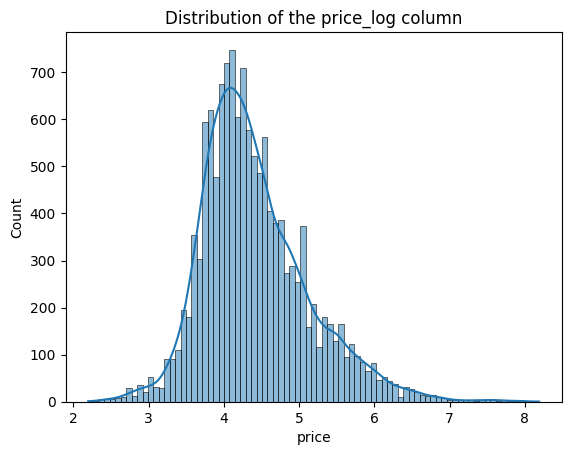

In [22]:
price_log = np.log1p(df["price"])

sns.histplot(price_log,kde=True)
plt.title("Distribution of the price_log column")
df["price_log"] = np.log1p(df["price"])


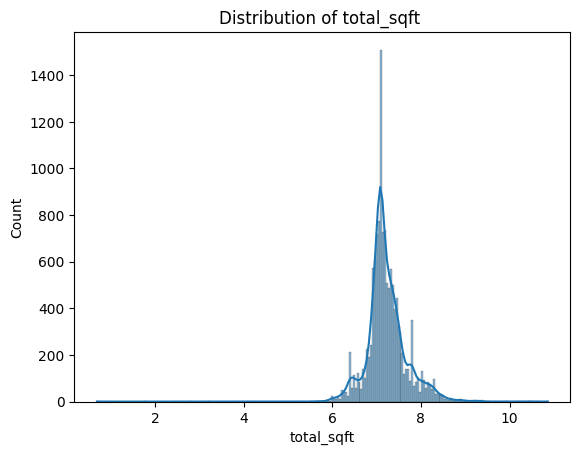

In [23]:
# as the data is right skewed we will be applying log transform


total_sqft_log = np.log1p(df["total_sqft"])
sns.histplot(total_sqft_log,kde=True)
plt.title("Distribution of total_sqft ")

df["total_sqft_log"] = np.log1p(df["total_sqft"])



Text(0.5, 1.0, 'Correlation Heatmap of Numeric Features')

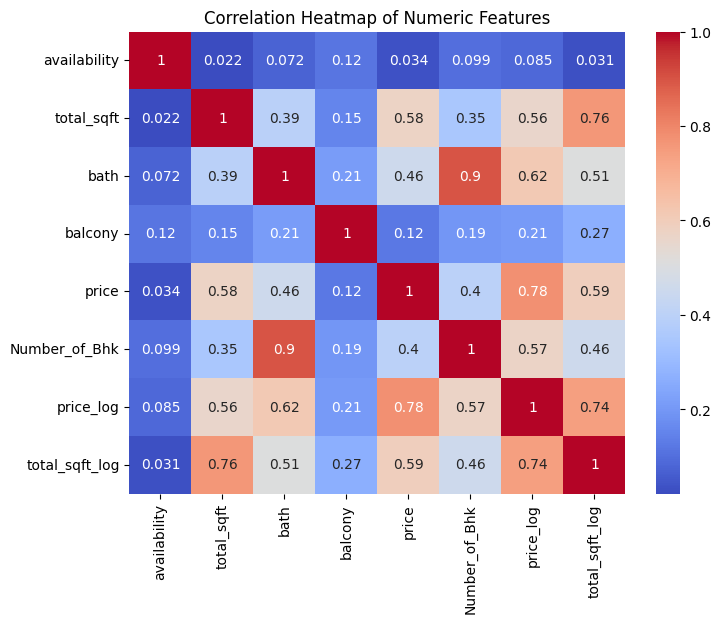

In [24]:
# correlation analysis
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")

Text(0, 0.5, 'Location')

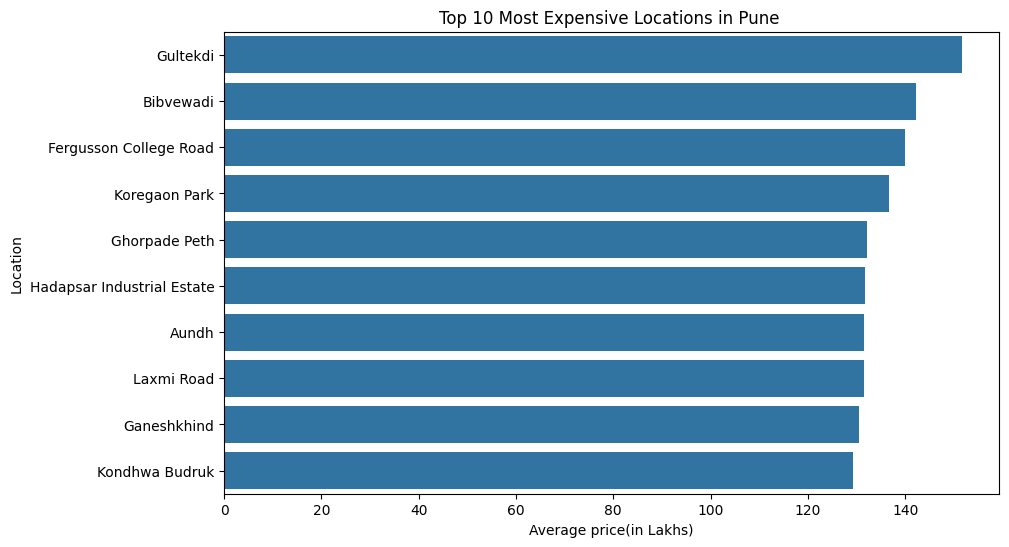

In [25]:
top_locations = df.groupby("site_location")["price"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_locations,y=top_locations.index)
plt.title("Top 10 Most Expensive Locations in Pune ")
plt.xlabel("Average price(in Lakhs)")
plt.ylabel("Location")

<Axes: xlabel='total_sqft_log', ylabel='price_log'>

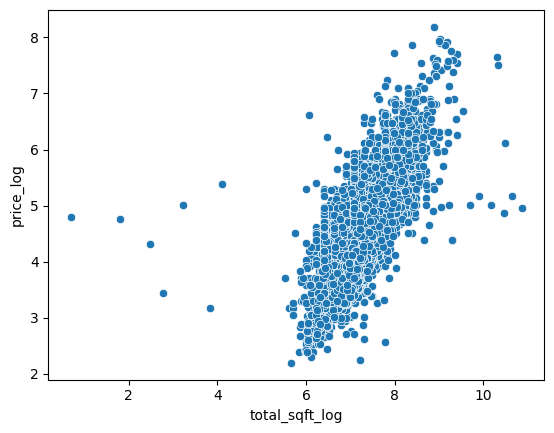

In [26]:
sns.scatterplot(data=df,x="total_sqft_log",y="price_log")

Text(0.5, 1.0, 'Number_of_Bhkrooms vs Price')

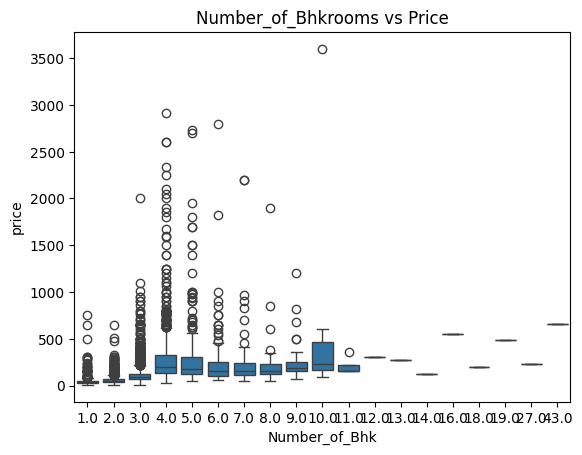

In [27]:
sns.boxplot(x="Number_of_Bhk", y="price", data=df)
plt.title("Number_of_Bhkrooms vs Price")


Text(0.5, 1.0, 'BHK vs Price')

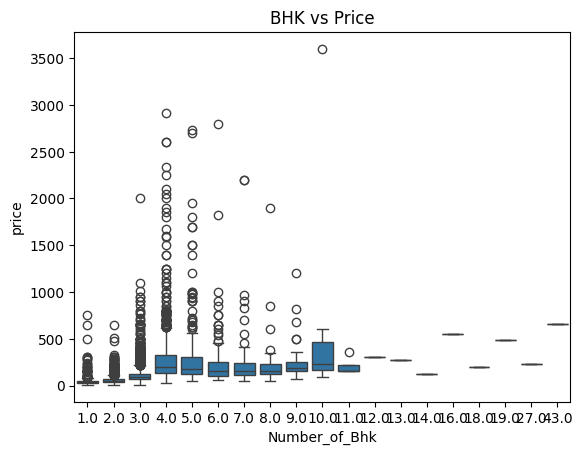

In [28]:
sns.boxplot(x="Number_of_Bhk", y="price", data=df)
plt.title("BHK vs Price")


In [29]:
df["site_location"].unique()

array(['Alandi Road', 'Ambegaon Budruk', 'Anandnagar', 'Aundh',
       'Aundh Road', 'Balaji Nagar', 'Baner', 'Baner road',
       'Bhandarkar Road', 'Bhavani Peth', 'Bibvewadi', 'Bopodi',
       'Budhwar Peth', 'Bund Garden Road', 'Camp', 'Chandan Nagar',
       'Dapodi', 'Deccan Gymkhana', 'Dehu Road', 'Dhankawadi',
       'Dhayari Phata', 'Dhole Patil Road', 'Erandwane', 'Fatima Nagar',
       'Fergusson College Road', 'Ganesh Peth', 'Ganeshkhind',
       'Ghorpade Peth', 'other', 'Gokhale Nagar', 'Gultekdi',
       'Guruwar peth', 'Hadapsar', 'Hadapsar Industrial Estate',
       'Hingne Khurd', 'Jangali Maharaj Road', 'Kalyani Nagar',
       'Karve Nagar', 'Karve Road', 'Kasba Peth', 'Katraj', 'Khadaki',
       'Khadki', 'Kharadi', 'Kondhwa', 'Kondhwa Budruk', 'Kondhwa Khurd',
       'Koregaon Park', 'Kothrud', 'Law College Road', 'Laxmi Road',
       'Lulla Nagar', 'Mahatma Gandhi Road', 'Mangalwar peth',
       'Manik Bagh', 'Market yard', 'Model colony', 'Mukund Nagar',
       '

In [30]:
df["site_location"] = df["site_location"].str.strip().str.title()


In [31]:
df["site_location"].unique()


array(['Alandi Road', 'Ambegaon Budruk', 'Anandnagar', 'Aundh',
       'Aundh Road', 'Balaji Nagar', 'Baner', 'Baner Road',
       'Bhandarkar Road', 'Bhavani Peth', 'Bibvewadi', 'Bopodi',
       'Budhwar Peth', 'Bund Garden Road', 'Camp', 'Chandan Nagar',
       'Dapodi', 'Deccan Gymkhana', 'Dehu Road', 'Dhankawadi',
       'Dhayari Phata', 'Dhole Patil Road', 'Erandwane', 'Fatima Nagar',
       'Fergusson College Road', 'Ganesh Peth', 'Ganeshkhind',
       'Ghorpade Peth', 'Other', 'Gokhale Nagar', 'Gultekdi',
       'Guruwar Peth', 'Hadapsar', 'Hadapsar Industrial Estate',
       'Hingne Khurd', 'Jangali Maharaj Road', 'Kalyani Nagar',
       'Karve Nagar', 'Karve Road', 'Kasba Peth', 'Katraj', 'Khadaki',
       'Khadki', 'Kharadi', 'Kondhwa', 'Kondhwa Budruk', 'Kondhwa Khurd',
       'Koregaon Park', 'Kothrud', 'Law College Road', 'Laxmi Road',
       'Lulla Nagar', 'Mahatma Gandhi Road', 'Mangalwar Peth',
       'Manik Bagh', 'Market Yard', 'Model Colony', 'Mukund Nagar',
       '

In [32]:
df['site_location'] = df['site_location'].replace({
    'Baner Road': 'Baner',
    'Aundh Road': 'Aundh',
    'Kondhwa Budruk': 'Kondhwa',
    'Kondhwa Khurd': 'Kondhwa',
    'Khadaki': 'Khadki',
    'Hadapsar Industrial Estate': 'Hadapsar',
    'Karve Road': 'Karve Nagar',
    'Paud Road': 'Karve Nagar',
    'Law College Road': 'Deccan Area',
    'Fergusson College Road': 'Deccan Area',
    'Bhandarkar Road': 'Deccan Area'
})


In [33]:
df["site_location"].unique()

array(['Alandi Road', 'Ambegaon Budruk', 'Anandnagar', 'Aundh',
       'Balaji Nagar', 'Baner', 'Deccan Area', 'Bhavani Peth',
       'Bibvewadi', 'Bopodi', 'Budhwar Peth', 'Bund Garden Road', 'Camp',
       'Chandan Nagar', 'Dapodi', 'Deccan Gymkhana', 'Dehu Road',
       'Dhankawadi', 'Dhayari Phata', 'Dhole Patil Road', 'Erandwane',
       'Fatima Nagar', 'Ganesh Peth', 'Ganeshkhind', 'Ghorpade Peth',
       'Other', 'Gokhale Nagar', 'Gultekdi', 'Guruwar Peth', 'Hadapsar',
       'Hingne Khurd', 'Jangali Maharaj Road', 'Kalyani Nagar',
       'Karve Nagar', 'Kasba Peth', 'Katraj', 'Khadki', 'Kharadi',
       'Kondhwa', 'Koregaon Park', 'Kothrud', 'Laxmi Road', 'Lulla Nagar',
       'Mahatma Gandhi Road', 'Mangalwar Peth', 'Manik Bagh',
       'Market Yard', 'Model Colony', 'Mukund Nagar', 'Mundhawa',
       'Nagar Road', 'Nana Peth', 'Narayan Peth', 'Narayangaon',
       'Navi Peth', 'Padmavati', 'Parvati Darshan', 'Pashan', 'Pirangut',
       'Prabhat Road', 'Pune Railway Station',

### outliers detection

In [34]:
q1 = df['price'].quantile(0.25)
q3 = df["price"].quantile(0.75)
iqr = q3-q1

lower_limit  = q1 - 1.5 * iqr
upper_limit  = q3 + 1.5 * iqr

print(lower_limit)
print(upper_limit)
outliers = df[(df['price'] < lower_limit) | (df['price'] > upper_limit)]
print("Number of outliers in price:", len(outliers))

-55.0
225.0
Number of outliers in price: 1267


In [35]:
df = df[(df['price'] >= lower_limit) & (df['price'] <= upper_limit)]
print("Data shape after removing price outliers:", df.shape)


Data shape after removing price outliers: (12007, 11)


<Axes: xlabel='price'>

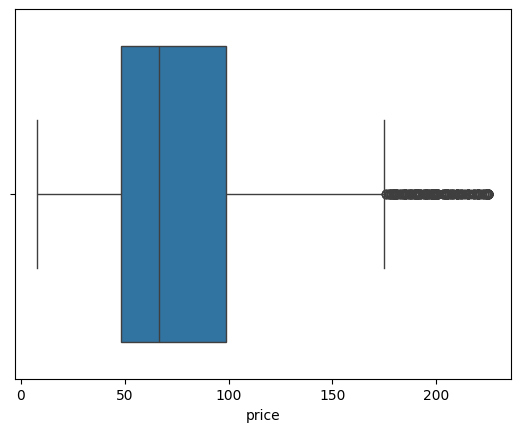

In [36]:
sns.boxplot(data=df,x=df["price"])

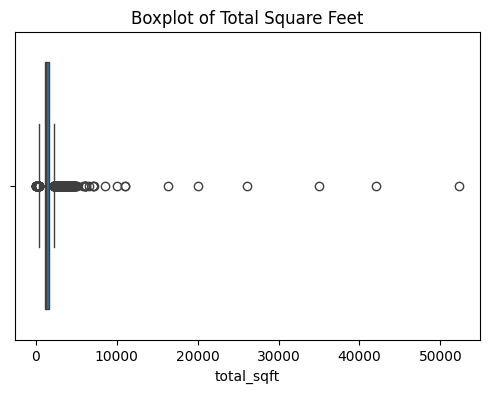

In [37]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["total_sqft"])
plt.title("Boxplot of Total Square Feet")
plt.show()

In [38]:
Q1 = df["total_sqft"].quantile(0.25)
Q3 = df["total_sqft"].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)
print("Outliers above upper limit:", df[df["total_sqft"] > upper_limit].shape[0])
print("Outliers below lower limit:", df[df["total_sqft"] < lower_limit].shape[0])


Lower Limit: 375.0
Upper Limit: 2255.0
Outliers above upper limit: 689
Outliers below lower limit: 22


In [39]:
df = df[(df["total_sqft"] >= lower_limit) & (df["total_sqft"] <= upper_limit)]


Text(0.5, 1.0, 'boxplot after removing the outliers of total_sqft')

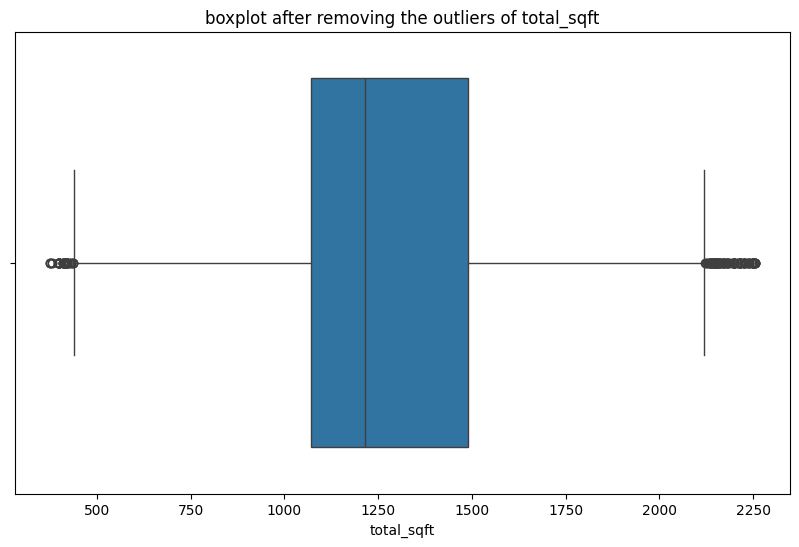

In [40]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x=df["total_sqft"])
plt.title("boxplot after removing the outliers of total_sqft")

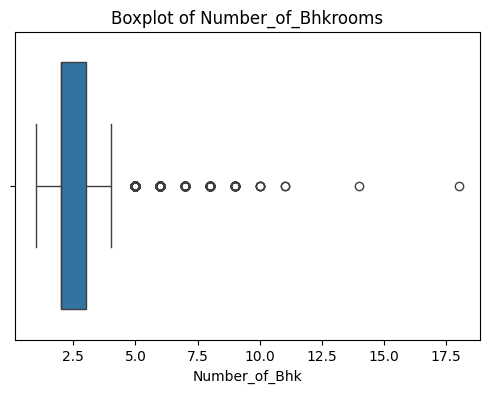

In [41]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Number_of_Bhk'])
plt.title("Boxplot of Number_of_Bhkrooms")
plt.show()

In [42]:
Q1 = df['Number_of_Bhk'].quantile(0.25)
Q3 = df['Number_of_Bhk'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

outliers_above = df[df['Number_of_Bhk'] > upper_limit]
outliers_below = df[df['Number_of_Bhk'] < lower_limit]

print("Outliers above upper limit:", len(outliers_above))
print("Outliers below lower limit:", len(outliers_below))
print("Total outliers:", len(outliers_above) + len(outliers_below))


Lower Limit: 0.5
Upper Limit: 4.5
Outliers above upper limit: 407
Outliers below lower limit: 0
Total outliers: 407


In [43]:
df = df[(df["Number_of_Bhk"] >= lower_limit) & (df["Number_of_Bhk"] <= upper_limit)]


Text(0.5, 1.0, 'boxplot removing outliers : ')

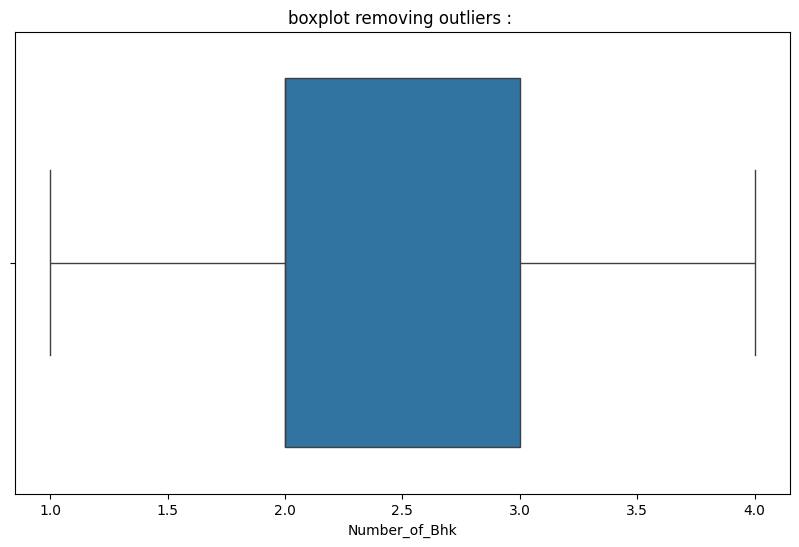

In [44]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x = df["Number_of_Bhk"])
plt.title("boxplot removing outliers : ")


<Axes: xlabel='Number_of_Bhk'>

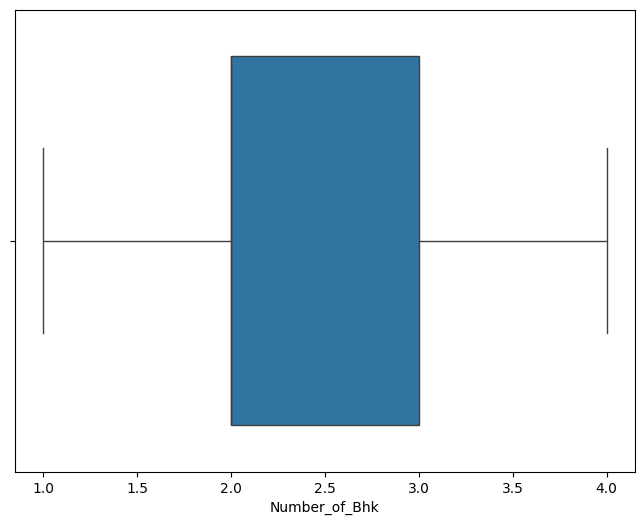

In [45]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x = df["Number_of_Bhk"])

In [46]:
Q1 = df['Number_of_Bhk'].quantile(0.25)
Q3 = df['Number_of_Bhk'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

outliers_above = df[df['Number_of_Bhk'] > upper_limit]
outliers_below = df[df['Number_of_Bhk'] < lower_limit]

print("Outliers above upper limit:", len(outliers_above))
print("Outliers below lower limit:", len(outliers_below))
print("Total outliers:", len(outliers_above) + len(outliers_below))


Lower Limit: 0.5
Upper Limit: 4.5
Outliers above upper limit: 0
Outliers below lower limit: 0
Total outliers: 0


In [47]:
df = df[(df["Number_of_Bhk"] >= lower_limit) & (df["Number_of_Bhk"] <= upper_limit)]


Text(0.5, 1.0, 'boxplot removing outliers from Number_of_Bhk')

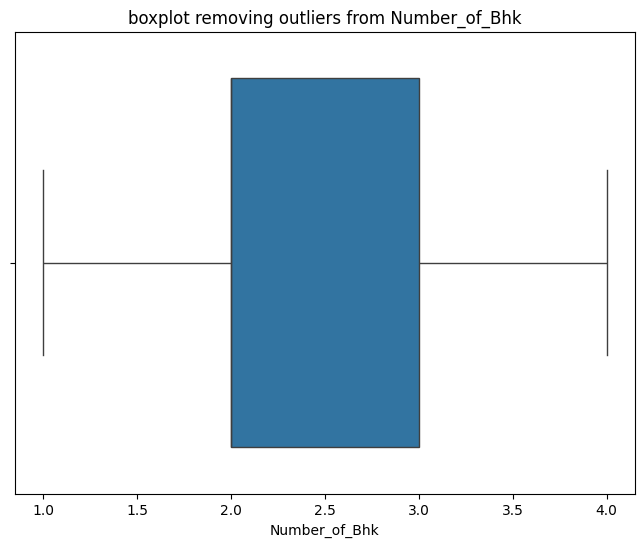

In [48]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x = df["Number_of_Bhk"])
plt.title("boxplot removing outliers from Number_of_Bhk")


## fetaure engineering

In [49]:
df_clean  = df.copy()

In [50]:
df_clean["price_per_sqft"]  = (df_clean["price"]*100000)/df_clean["total_sqft"]
df_clean['price_per_sqft'].describe()

count    10889.000000
mean      5664.737216
std       2523.077487
min        625.185185
25%       4108.280255
50%       5088.757396
75%       6432.748538
max      44000.000000
Name: price_per_sqft, dtype: float64

In [51]:
df_clean['area_per_bhk'] = df_clean['total_sqft'] / df_clean['Number_of_Bhk']
# if division by zero risk: fill / drop beforehand
df_clean['area_per_bhk'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_clean['area_per_bhk'].fillna(df_clean['area_per_bhk'].median(), inplace=True)
df_clean['area_per_bhk'].describe()


C:\Users\sujal\AppData\Local\Temp\ipykernel_11156\1698641057.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['area_per_bhk'].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\sujal\AppData\Local\Temp\ipykernel_11156\1698641057.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

count    10889.000000
mean       540.145710
std        120.544519
min        100.000000
25%        476.666667
50%        546.666667
75%        601.333333
max       2000.000000
Name: area_per_bhk, dtype: float64

In [52]:
df_clean['bath_per_bhk'] = df_clean['bath'] / df_clean['Number_of_Bhk']
df_clean['bath_per_bhk'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_clean['bath_per_bhk'].fillna(df_clean['bath_per_bhk'].median(), inplace=True)
df_clean['bath_per_bhk'].describe()


C:\Users\sujal\AppData\Local\Temp\ipykernel_11156\3730911290.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['bath_per_bhk'].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\sujal\AppData\Local\Temp\ipykernel_11156\3730911290.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

count    10889.000000
mean         0.954947
std          0.161019
min          0.250000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: bath_per_bhk, dtype: float64

In [53]:
df = df_clean.copy()

In [54]:
df.head(2)

,area_type,availability,society,total_sqft,bath,balcony,price,site_location,Number_of_Bhk,price_log,total_sqft_log,price_per_sqft,area_per_bhk,bath_per_bhk
0,Super built-up Area,0,Coomee,1056.0,2.0,1.0,39.07,Alandi Road,2.0,3.690628,6.963190,3699.810606,528.0,1.000000
2,Built-up Area,1,Unknown,1440.0,2.0,3.0,62.00,Anandnagar,3.0,4.143135,7.273093,4305.555556,480.0,0.666667


In [55]:

df = df.drop("society",axis=1)

In [56]:
df.head(2)

,area_type,availability,total_sqft,bath,balcony,price,site_location,Number_of_Bhk,price_log,total_sqft_log,price_per_sqft,area_per_bhk,bath_per_bhk
0,Super built-up Area,0,1056.0,2.0,1.0,39.07,Alandi Road,2.0,3.690628,6.963190,3699.810606,528.0,1.000000
2,Built-up Area,1,1440.0,2.0,3.0,62.00,Anandnagar,3.0,4.143135,7.273093,4305.555556,480.0,0.666667


In [57]:
from sklearn.preprocessing import OneHotEncoder


# Step 1: Define categorical columns
categorical_cols = ["area_type", "site_location"]

# Step 2: Initialize encoder
encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

# Step 3: Fit and transform categorical columns
encoded_data = encoder.fit_transform(df[categorical_cols])

# Step 4: Convert encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Step 5: Merge encoded columns with the rest of the data
df_clean_encoded = pd.concat(
    [df.drop(columns=categorical_cols).reset_index(drop=True),
     encoded_df.reset_index(drop=True)],
    axis=1
)

# Step 6: Save the encoded dataset
df_clean_encoded.to_csv("df_clean_encoded.csv", index=False)

print(" Encoding done and saved as df_clean_encoded.csv")
print(df_clean_encoded.head())


 Encoding done and saved as df_clean_encoded.csv
   availability  total_sqft  bath  balcony  price  Number_of_Bhk  price_log  \
0             0      1056.0   2.0      1.0  39.07            2.0   3.690628   
1             1      1440.0   2.0      3.0  62.00            3.0   4.143135   
2             1      1521.0   3.0      1.0  95.00            3.0   4.564348   
3             1      1200.0   2.0      1.0  51.00            2.0   3.951244   
4             1      1170.0   2.0      1.0  38.00            2.0   3.663562   

   total_sqft_log  price_per_sqft  area_per_bhk  ...  \
0        6.963190     3699.810606         528.0  ...   
1        7.273093     4305.555556         480.0  ...   
2        7.327781     6245.890861         507.0  ...   
3        7.090910     4250.000000         600.0  ...   
4        7.065613     3247.863248         585.0  ...   

   site_location_Uruli Devachi  site_location_Vadgaon Budruk  \
0                          0.0                           0.0   
1          

In [58]:
df_clean_encoded.head(2)

,availability,total_sqft,bath,balcony,price,Number_of_Bhk,price_log,total_sqft_log,price_per_sqft,area_per_bhk,...,site_location_Uruli Devachi,site_location_Vadgaon Budruk,site_location_Viman Nagar,site_location_Vishrant Wadi,site_location_Wadgaon Sheri,site_location_Wagholi,site_location_Wakadewadi,site_location_Wanowrie,site_location_Warje,site_location_Yerawada
0,0,1056.0,2.0,1.0,39.07,2.0,3.690628,6.963190,3699.810606,528.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1440.0,2.0,3.0,62.00,3.0,4.143135,7.273093,4305.555556,480.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
df_clean_encoded = df_clean_encoded.fillna(df_clean_encoded.mean(numeric_only=True))


In [60]:
x =  df_clean_encoded.drop(columns=['price', 'price_log'])
y = df_clean_encoded["price_log"]

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [63]:
lr = LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [64]:
y_pred  = lr.predict(x_test)

In [65]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2}")
print(f"mse Score: {mse}")
print(f"RMSE: {rmse}")


R² Score: 0.96028611783059
mse Score: 0.009277946317934943
RMSE: 0.09632209672725642


In [66]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=10)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
r2_rf = r2_score(y_test, y_pred_rf)


print(f"R² Score (Random Forest): {r2_rf}")

R² Score (Random Forest): 0.9992417624343214


# ACTUAL VS PREDICTED

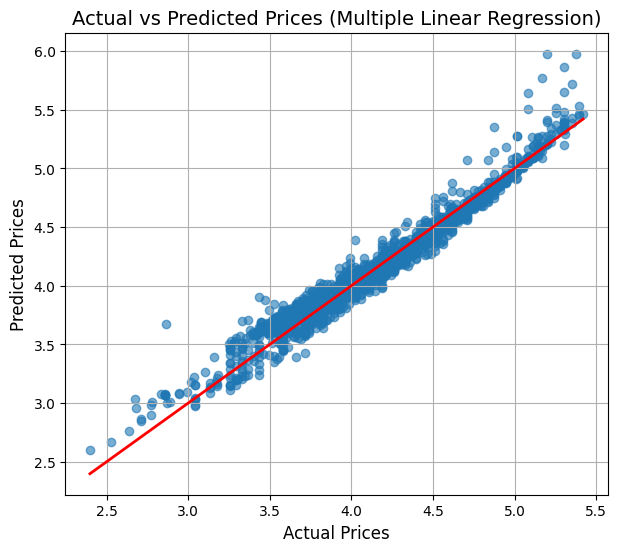

In [67]:
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Prices", fontsize=12)
plt.ylabel("Predicted Prices", fontsize=12)
plt.title("Actual vs Predicted Prices (Multiple Linear Regression)", fontsize=14)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # ideal fit line
plt.grid(True)
plt.show()

In [68]:
y_pred_lakhs = np.expm1(y_pred)  

In [69]:
y_pred_lakhs.shape

(2178,)

In [70]:
print(y_pred_lakhs)


[ 53.42105452  60.40554504 118.12862309 ...  41.22839798  79.24852272
  59.60731844]


In [71]:
import joblib
joblib.dump(lr, "model/House_Price_model.pkl")


['model/House_Price_model.pkl']

In [72]:
import numpy as np
import joblib

joblib.dump(y_test, "model/y_test.pkl")
joblib.dump(y_pred, "model/y_pred.pkl")


['model/y_pred.pkl']